In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import pickle

from datetime import datetime
import sys
import os

sys.path.append(os.path.abspath("../../src"))   
import Soporte_preprocesamiento as f

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
pd.set_option("display.max_columns", None)
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

In [2]:
df_sinnull_encoded=pd.read_pickle("../../datos/datos1/datos_sinnull_encoded.pkl").reset_index(drop=True)


In [3]:
df_sinnull_encoded.head()

,Age,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Gender_Female,Gender_Male,DistanceFromHome_entre 1 y 4,DistanceFromHome_entre 13 y 18,DistanceFromHome_entre 19 y 23,DistanceFromHome_entre 24 y 29,DistanceFromHome_entre 5 y 8,DistanceFromHome_entre 9 y 12,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,JobLevel_Head,JobLevel_Intern,JobLevel_Junior,JobLevel_Manager,JobLevel_Senior,StockOptionLevel_Bad,StockOptionLevel_Best,StockOptionLevel_Better,StockOptionLevel_Good
0,51.0,0.0,0.149569,0.150224,0.166667,0.145038,0.124814,1482.108,0.187821,11.0,0.491736,0.061538,1.0,0.0,0.137729,0.113952,0.167319,0.153226,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,31.0,1.0,0.249097,0.157128,0.166667,0.181507,0.255319,473.357,0.117747,23.0,0.176000,0.175153,5.0,1.0,0.137729,0.164887,0.178414,0.160000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,32.0,0.0,0.249097,0.157128,0.121951,0.168712,0.124814,2184.064,0.187821,15.0,0.181818,0.171846,5.0,0.0,0.151796,0.164887,0.313808,0.153226,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,38.0,0.0,0.080000,0.157128,0.166667,0.134615,0.124814,940.273,0.102510,11.0,0.090918,0.142857,8.0,7.0,0.133882,0.113952,0.142486,0.160000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,32.0,0.0,0.149569,0.157128,0.161638,0.168712,0.255319,264.646,0.122931,12.0,0.104167,0.171846,6.0,0.0,0.133882,0.229070,0.142486,0.153226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
numericas=df_sinnull_encoded.select_dtypes(include=np.number)

In [5]:
numericas.drop(columns="Attrition",inplace=True)

In [6]:
numerical_columns =numericas.columns   

Dada la existencia de bastantes outliers Univariados me planteo el uso entre RobustScaler y StandardScaler porque tienen sentido esos outliers

In [7]:
scaler = RobustScaler()
df_sinnull_encoded[numerical_columns]= scaler.fit_transform(df_sinnull_encoded[numerical_columns])

In [ ]:


with open('../../transformers/preprocesamiento1/scaler.pkl', 'wb') as s:
    pickle.dump(scaler, s)

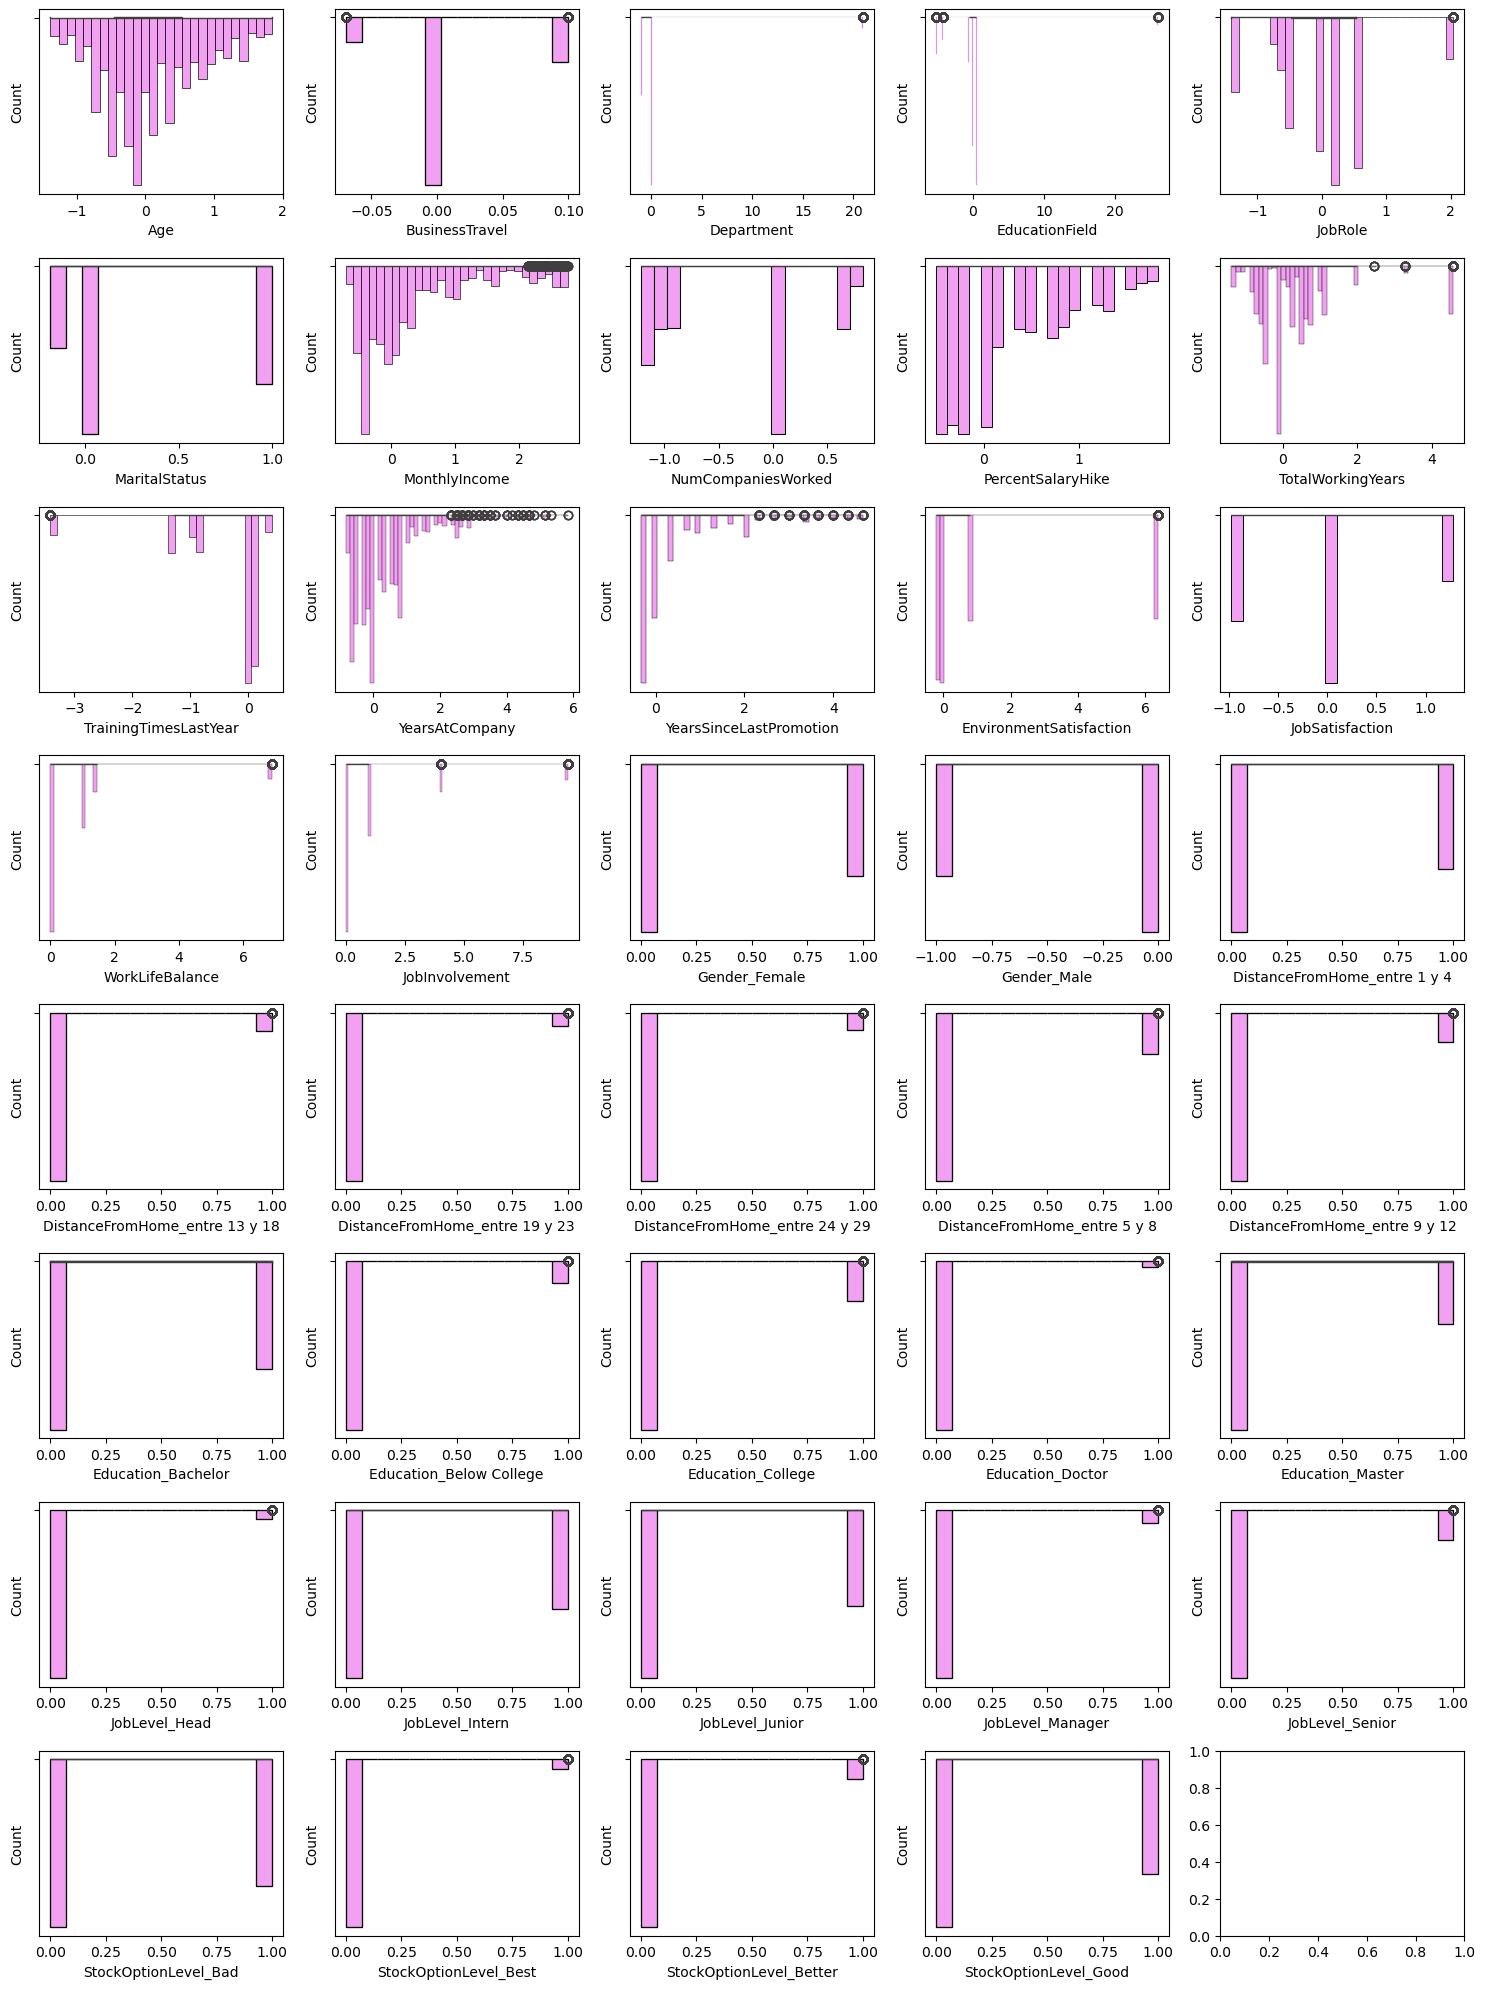

In [ ]:
f.visualizar_outliers_box(df_sinnull_encoded, numerical_columns)

En esta gráfica recordamos las distribuciones (Tanto de categóricas como de numéricas) y en el caso de las numéricas muestro sus outliers univariados.

In [10]:
df_sinnull_encoded.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'Gender_Female',
       'Gender_Male', 'DistanceFromHome_entre 1 y 4',
       'DistanceFromHome_entre 13 y 18', 'DistanceFromHome_entre 19 y 23',
       'DistanceFromHome_entre 24 y 29', 'DistanceFromHome_entre 5 y 8',
       'DistanceFromHome_entre 9 y 12', 'Education_Bachelor',
       'Education_Below College', 'Education_College', 'Education_Doctor',
       'Education_Master', 'JobLevel_Head', 'JobLevel_Intern',
       'JobLevel_Junior', 'JobLevel_Manager', 'JobLevel_Senior',
       'StockOptionLevel_Bad', 'StockOptionLevel_Best',
       'StockOptionLevel_Better', 'StockOptionLevel_Good'],
      dtype='object')

In [11]:
df_sinnull_encoded.head(2)

,Age,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Gender_Female,Gender_Male,DistanceFromHome_entre 1 y 4,DistanceFromHome_entre 13 y 18,DistanceFromHome_entre 19 y 23,DistanceFromHome_entre 24 y 29,DistanceFromHome_entre 5 y 8,DistanceFromHome_entre 9 y 12,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,JobLevel_Head,JobLevel_Intern,JobLevel_Junior,JobLevel_Manager,JobLevel_Senior,StockOptionLevel_Bad,StockOptionLevel_Best,StockOptionLevel_Better,StockOptionLevel_Good
0,1.153846,0.0,0.000000,-1.0,0.533046,-0.463706,0.0,1.498811,0.0,-0.5,4.573311,-3.415572,-0.666667,-0.333333,0.0,-0.976241,1.000000,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.384615,1.0,0.099529,0.0,0.533046,0.523841,1.0,-0.133480,-1.0,1.5,0.507253,0.102377,0.000000,0.000000,0.0,0.023759,1.446791,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:

df_sinnull_encoded.to_pickle("../../datos/datos1/datos_sinnull_encoded_scaled.pkl")